In [31]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets

In [32]:
# 定义要拟合的函数为正弦函数
def true_function(x):
    return np.sin(x)

基于 ReLU 的两层神经网络

In [33]:
class ReLU_Network:
    def __init__(self):
        self.W1 = tf.Variable(tf.random.normal([1, 100]), dtype=tf.float32)
        self.b1 = tf.Variable(tf.zeros([100]), dtype=tf.float32)
        self.W2 = tf.Variable(tf.random.normal([100, 1]), dtype=tf.float32)
        self.b2 = tf.Variable(tf.zeros([1]), dtype=tf.float32)

    def __call__(self, x):
        hidden_layer = tf.nn.relu(tf.matmul(x, self.W1) + self.b1)
        output = tf.matmul(hidden_layer, self.W2) + self.b2
        return output

In [34]:
# 生成训练集和测试集
num_train_samples = 1000
num_test_samples = 200
x_train = np.random.uniform(-2*np.pi, 2*np.pi, size=(num_train_samples, 1))
y_train = true_function(x_train) + np.random.normal(loc=0, scale=0.1, size=(num_train_samples, 1))
x_test = np.linspace(-2*np.pi, 2*np.pi, num_test_samples).reshape(-1, 1)
y_test = true_function(x_test)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)


(1000, 1) (1000, 1) (200, 1) (200, 1)


In [35]:
# 训练模型
def train_model(model, x_train, y_train, epochs=100, learning_rate=0.01):
    optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            predictions = model(x_train)
            loss = tf.reduce_mean(tf.square(predictions - y_train))
        gradients = tape.gradient(loss, [model.W1, model.b1, model.W2, model.b2])
        optimizer.apply_gradients(zip(gradients, [model.W1, model.b1, model.W2, model.b2]))
        if epoch % 10 == 0:
            print("Epoch {}, Loss: {:.4f}".format(epoch, loss.numpy()))

In [36]:
# 测试模型
def test_model(model, x_test, y_test):
    predictions = model(x_test)
    test_loss = tf.reduce_mean(tf.square(predictions - y_test))
    print("Test Loss: {:.4f}".format(test_loss.numpy()))

In [43]:
# 创建模型实例并训练
model = ReLU_Network()
train_model(model, x_train, y_train,epochs=2000)
# 测试模型
test_model(model, x_test, y_test)

Epoch 0, Loss: 35.6589
Epoch 10, Loss: 1.0080
Epoch 20, Loss: 0.2263
Epoch 30, Loss: 0.2652
Epoch 40, Loss: 0.3412
Epoch 50, Loss: 0.3014
Epoch 60, Loss: 0.2294
Epoch 70, Loss: 0.2011
Epoch 80, Loss: 0.2023
Epoch 90, Loss: 0.1956
Epoch 100, Loss: 0.1921
Epoch 110, Loss: 0.1869
Epoch 120, Loss: 0.1825
Epoch 130, Loss: 0.1816
Epoch 140, Loss: 0.1805
Epoch 150, Loss: 0.1794
Epoch 160, Loss: 0.1784
Epoch 170, Loss: 0.1774
Epoch 180, Loss: 0.1762
Epoch 190, Loss: 0.1748
Epoch 200, Loss: 0.1736
Epoch 210, Loss: 0.1726
Epoch 220, Loss: 0.1716
Epoch 230, Loss: 0.1706
Epoch 240, Loss: 0.1696
Epoch 250, Loss: 0.1686
Epoch 260, Loss: 0.1677
Epoch 270, Loss: 0.1668
Epoch 280, Loss: 0.1658
Epoch 290, Loss: 0.1649
Epoch 300, Loss: 0.1639
Epoch 310, Loss: 0.1629
Epoch 320, Loss: 0.1620
Epoch 330, Loss: 0.1609
Epoch 340, Loss: 0.1600
Epoch 350, Loss: 0.1590
Epoch 360, Loss: 0.1580
Epoch 370, Loss: 0.1571
Epoch 380, Loss: 0.1561
Epoch 390, Loss: 0.1552
Epoch 400, Loss: 0.1543
Epoch 410, Loss: 0.1534
Ep

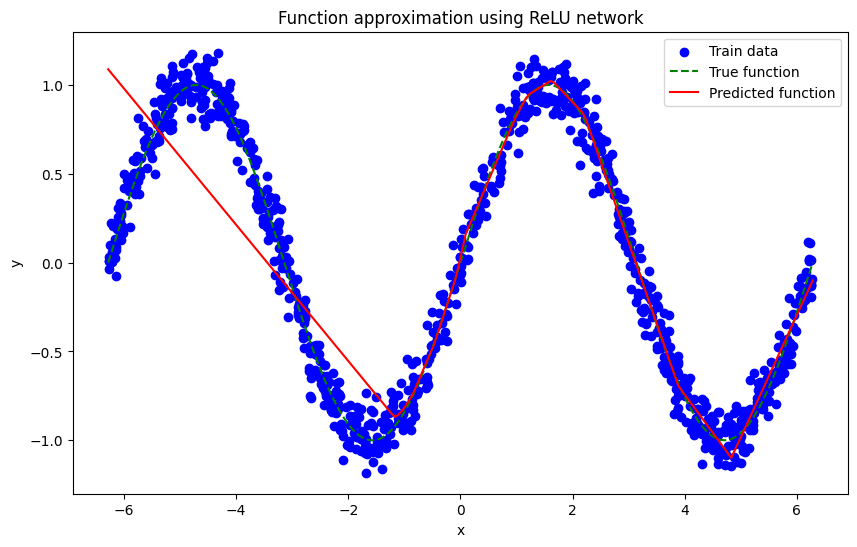

In [44]:
# 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Train data')
plt.plot(x_test, y_test, color='green', linestyle='--', label='True function')
plt.plot(x_test, model(x_test), color='red', label='Predicted function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function approximation using ReLU network')
plt.legend()
plt.show()